In [1]:
# Importing necessary libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow
#from sklearn.preprocessing import LabelEncoder
#from tensorflow.python.keras import utils
#from keras.models import Sequential
#from keras.layers import Dense, Flatten, InputLayer
#import keras
#import imageio # To read images
#from PIL import Image # For image resizing 
import cv2
import imghdr

/var/folders/_8/148cttd15znc32r8pbz697l00000gn/T/ipykernel_1679/40218394.py:15: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [6]:
data_dir = r'D:\Documents\CSE-code\python\Tuberculosis Detection system\TB_Chest_Radiography_Database' 
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [10]:
for image_class in os.listdir(data_dir): 
    class_dir = os.path.join(data_dir, image_class)

    # Skip if it's not a directory (e.g., `.DS_Store` or other files)
    if not os.path.isdir(class_dir):
        continue
    
    for image in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image)
        
        # Skip if it's not a file
        if not os.path.isfile(image_path):
            continue

        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)  # Detect the image type
            
            # Check if the detected image type is in the list of allowed extensions
            if tip not in image_exts: 
                print(f'Image not in ext list {image_path}')
                os.remove(image_path)  # Remove file if not a valid image type
        except Exception as e: 
            print(f'Issue with image {image_path}: {str(e)}')
            os.remove(image_path)  # Remove file if any error occurs

In [11]:
import numpy as np
from matplotlib import pyplot as plt

data = tensorflow.keras.utils.image_dataset_from_directory(data_dir)
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

Found 4200 files belonging to 2 classes.


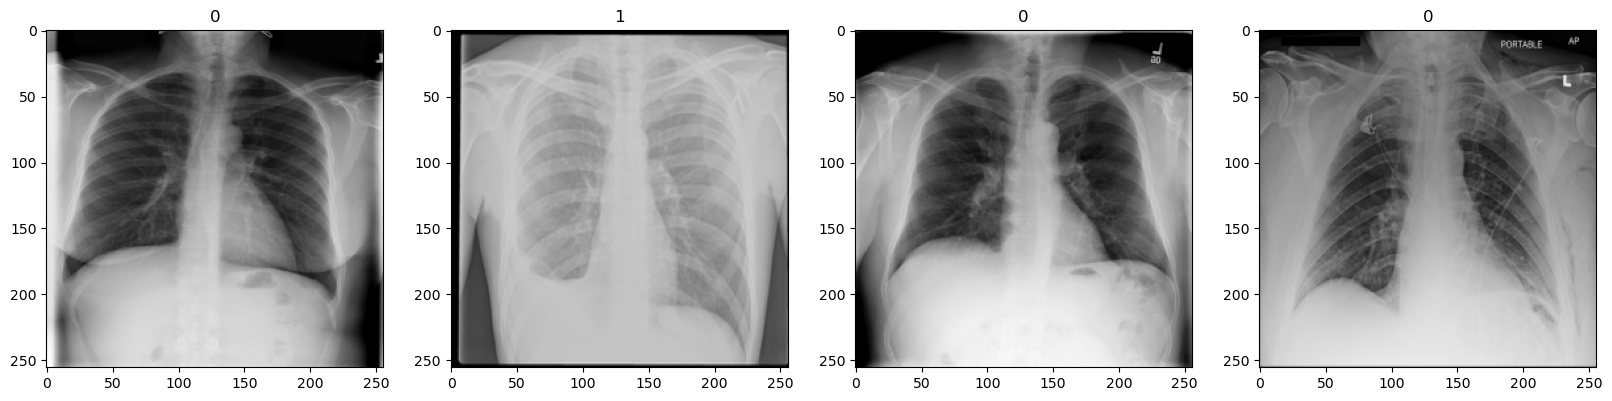

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [13]:
data = data.map(lambda x,y: (x/255, y))

In [14]:
data.as_numpy_iterator().next()

(array([[[[1.70588240e-01, 1.70588240e-01, 1.70588240e-01],
          [1.70588240e-01, 1.70588240e-01, 1.70588240e-01],
          [1.72549024e-01, 1.72549024e-01, 1.72549024e-01],
          ...,
          [1.12745099e-01, 1.12745099e-01, 1.12745099e-01],
          [1.14705883e-01, 1.14705883e-01, 1.14705883e-01],
          [1.21568628e-01, 1.21568628e-01, 1.21568628e-01]],
 
         [[1.73529416e-01, 1.73529416e-01, 1.73529416e-01],
          [1.69607848e-01, 1.69607848e-01, 1.69607848e-01],
          [1.68627456e-01, 1.68627456e-01, 1.68627456e-01],
          ...,
          [1.05882354e-01, 1.05882354e-01, 1.05882354e-01],
          [1.12745099e-01, 1.12745099e-01, 1.12745099e-01],
          [1.13725491e-01, 1.13725491e-01, 1.13725491e-01]],
 
         [[1.69607848e-01, 1.69607848e-01, 1.69607848e-01],
          [1.65686280e-01, 1.65686280e-01, 1.65686280e-01],
          [1.59803927e-01, 1.59803927e-01, 1.59803927e-01],
          ...,
          [1.00980394e-01, 1.00980394e-01, 1.0098

In [15]:
data

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [16]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [17]:
val_size

26

In [18]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [19]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [21]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.compile('adam', loss=tensorflow.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
tensorboard_callback = tensorflow.keras.callbacks.TensorBoard(log_dir='logs')

In [25]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 68s 722ms/step - accuracy: 0.8578 - loss: 0.3883 - val_accuracy: 0.9483 - val_loss: 0.1294
Epoch 2/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 61s 656ms/step - accuracy: 0.9460 - loss: 0.1378 - val_accuracy: 0.9531 - val_loss: 0.1071
Epoch 3/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 58s 632ms/step - accuracy: 0.9688 - loss: 0.0941 - val_accuracy: 0.9784 - val_loss: 0.0702
Epoch 4/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 59s 639ms/step - accuracy: 0.9763 - loss: 0.0764 - val_accuracy: 0.9663 - val_loss: 0.0747
Epoch 5/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 59s 642ms/step - accuracy: 0.9723 - loss: 0.0770 - val_accuracy: 0.9639 - val_loss: 0.1138
Epoch 6/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 59s 639ms/step - accuracy: 0.9705 - loss: 0.0977 - val_accuracy: 0.9772 - val_loss: 0.0862
Epoch 7/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 58s 625ms/step - accuracy: 0.9776 - loss: 0.0564 - val_accuracy: 0.9724 - val_loss: 0.0846
Epoch 8/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 56s 610ms/step - accuracy: 0.9852 - loss: 0.0429 - val_accu

In [26]:
# Saving Keras Artificial Neural Network model 
model.save("model.h5")

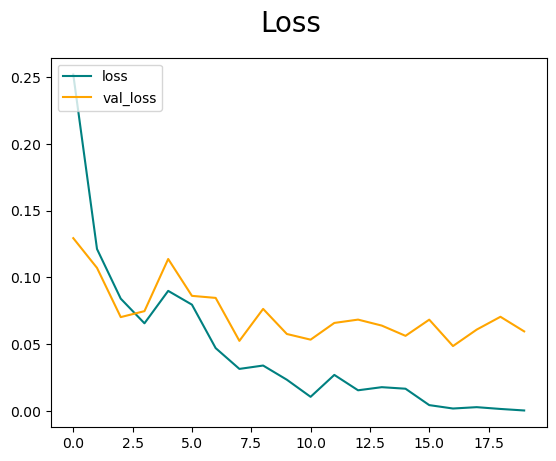

In [27]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

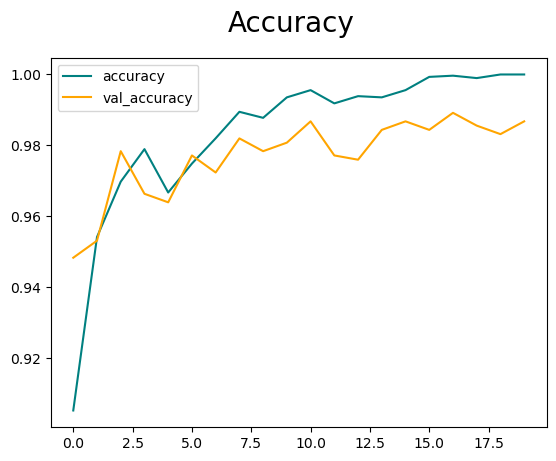

In [28]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [29]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [30]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [31]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


2024-10-21 10:27:12.651649: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [32]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.95652175, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.99278843, shape=(), dtype=float32)


In [33]:
import cv2

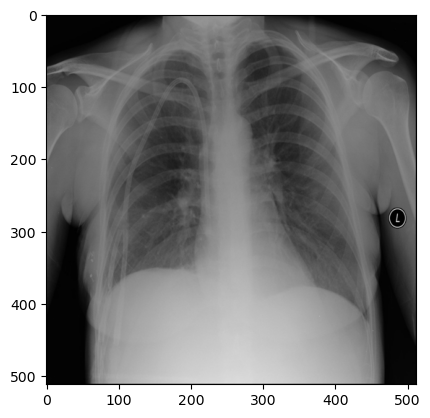

In [35]:
img = cv2.imread(r'/Users/vanshsharma/Documents/TB_Chest_Radiography_Database/TBChestX-Ray/Normal/Normal-1.png')
plt.imshow(img)
plt.show()

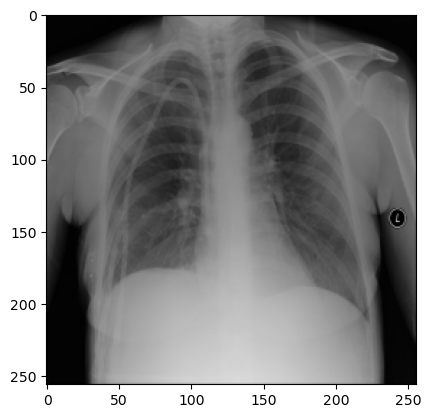

In [37]:
resize = tensorflow.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [39]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


In [40]:
yhat

array([[3.942441e-10]], dtype=float32)

In [41]:
if yhat < 0.5: 
    print(f'Predicted class is Normal')
else:
    print(f'Predicted class is TB')

Predicted class is Normal


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


2024-10-21 10:36:13.592491: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


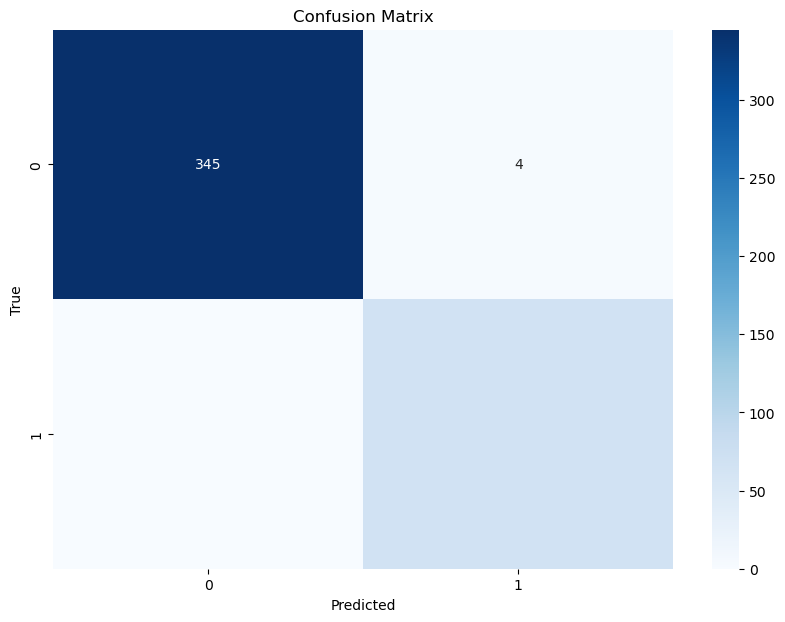

              precision    recall  f1-score   support

      Normal       1.00      0.99      0.99       349
          TB       0.94      1.00      0.97        67

    accuracy                           0.99       416
   macro avg       0.97      0.99      0.98       416
weighted avg       0.99      0.99      0.99       416



In [42]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions and true labels
y_true = []
y_pred = []

# Loop over the test dataset to get predictions and actual labels
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    
    # Append true labels and predicted labels
    y_true.extend(y)
    y_pred.extend(yhat)

# Convert y_pred to binary labels based on a threshold (0.5 in this case)
y_pred = np.array(y_pred)
y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_binary)

print('confusion:\n',cm)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_true, y_pred_binary, target_names=['Normal', 'TB']))